<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/Optimalen_kondenzator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iskanje optimalne konfiguracije za izenačenje polja pri različnih frekvencah

## Zaporedna resonanca

Računam XL+XC za konstanten L in C

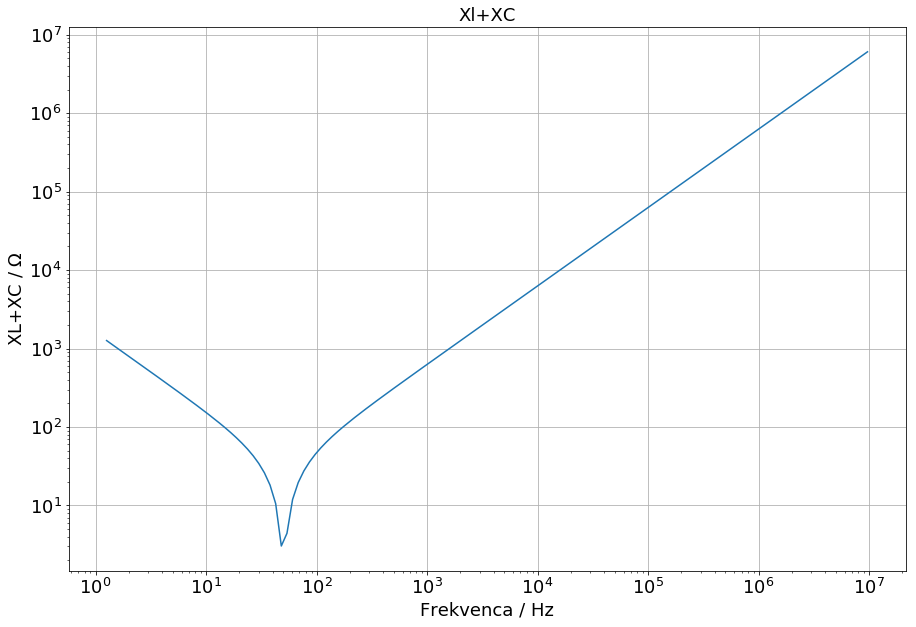

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt

L=100e-3
C=100e-6

s=np.arange(0.1,7,0.051)
freq=pow(10,s)

XL=(2*np.pi*freq)*L
XC=-1/(2*np.pi*freq*C)

plt.figure(figsize=(15,10))
plt.title('Xl+XC',fontsize=18)
plt.ylabel('XL+XC / $\Omega $',fontsize=18)
plt.xlabel('Frekvenca / Hz',fontsize=18)
plt.tick_params(labelsize=18)

plt.loglog(freq,abs(XL+XC))
plt.grid()
plt.show()


## Spreminjanje induktivnosti tuljave za konstanten Xc+Xl

Kako bi se mogla spreminjati induktivnost s frekvenco, da bi imeli konstanten XL+XC?

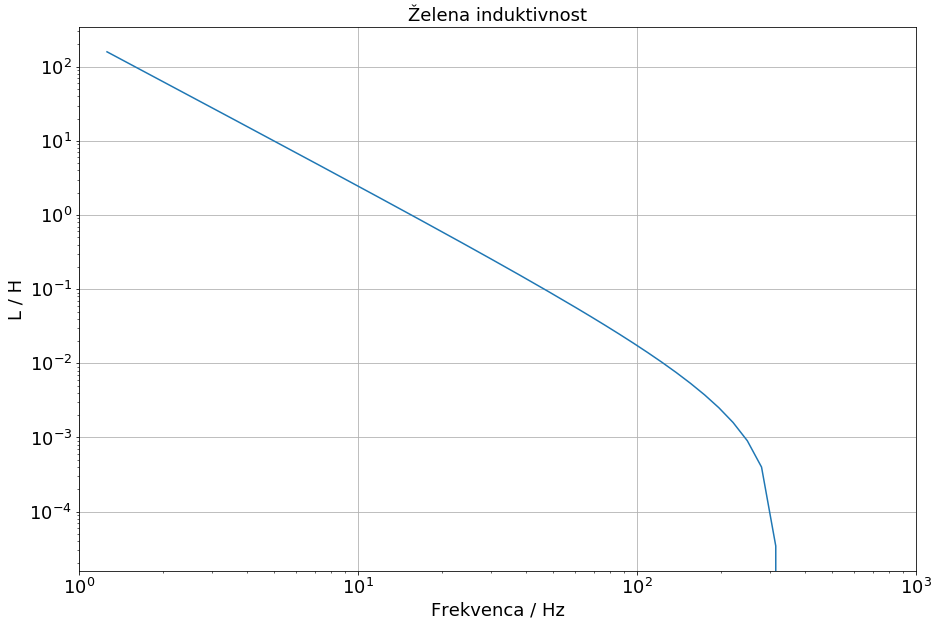

In [0]:
K=5
L=(1/(2*np.pi*freq*C)-K)/(2*np.pi*freq)
XL=(2*np.pi*freq)*L
XC=-1/(2*np.pi*freq*C)

plt.figure(figsize=(15,10))
plt.title('Želena induktivnost',fontsize=18)
plt.ylabel('L / H',fontsize=18)
plt.xlabel('Frekvenca / Hz',fontsize=18)
plt.tick_params(labelsize=18)
# plt.ylim(0,2)
plt.xlim(1,1000)

plt.loglog(freq,L)
plt.grid()
plt.show()

Rezultat kaže, da bi bio težko doseči tako spreminjanje induktivnosti s frekvenco

## Spreminjanje kapacitivnosti za konstanten Xc+Xl


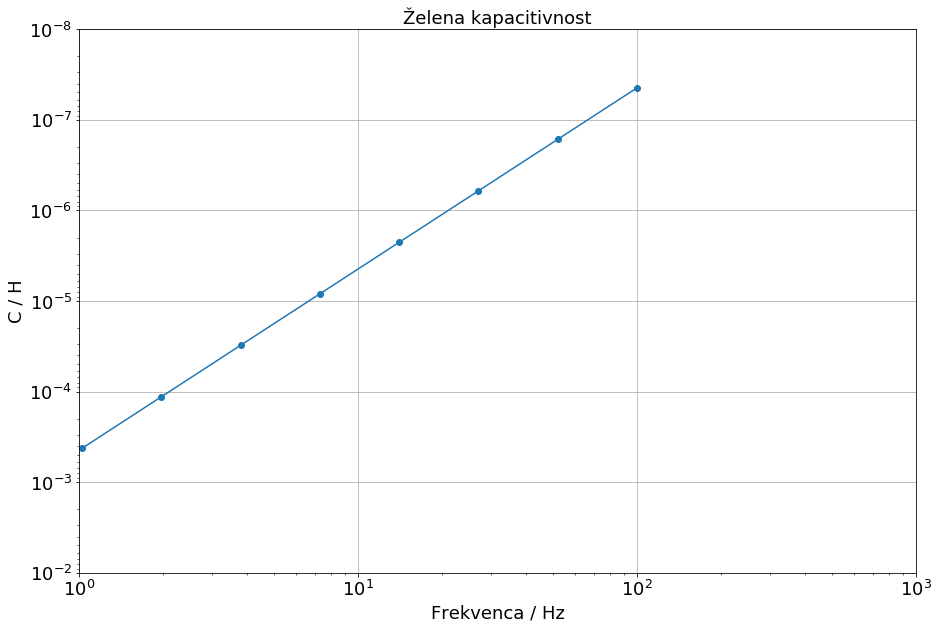

In [0]:
K=0
L=60-3
#s=np.arange(0.01,3,0.1)
s=np.linspace(0.01,2,8)
freq=pow(10,s)

C=1 /(K+2*np.pi*freq*L)/(2*np.pi*freq)
XL=(2*np.pi*freq)*L
XC=-1/(2*np.pi*freq*C)

plt.figure(figsize=(15,10))
plt.title('Želena kapacitivnost',fontsize=18)
plt.ylabel('C / H',fontsize=18)
plt.xlabel('Frekvenca / Hz',fontsize=18)
plt.tick_params(labelsize=18)
plt.ylim(1e-2,1e-8)
plt.xlim(1,1000)

plt.loglog(freq,C,'o-')
plt.grid()

In [0]:
C

array([4.24390260e-04, 1.14602470e-04, 3.09472847e-05, 8.35701385e-06,
       2.25673047e-06, 6.09408159e-07, 1.64564758e-07, 4.44391156e-08])

## Razdelim na 8 področij z določeno kapacitivnostjo

Koliko bo XL+XC, če znotraj frekvenčnega območja lahko vključujem 8 kondenzatorjev? Kolikšne vrednosti morajo imeti?

Copti =  0.0229204940560007 za frekvence med  1.023292992280754 in  1.9691813515545467
Copti =  0.006189456943298567 za frekvence med  1.9691813515545467 in  3.789408531634211
Copti =  0.0016714027699118136 za frekvence med  3.789408531634211 in  7.292176014304688
Copti =  0.00045134609463493377 za frekvence med  7.292176014304688 in  14.032752230245311
Copti =  0.00012188163188993342 za frekvence med  14.032752230245311 in  27.00402935545858
Copti =  3.291295165446955e-05 za frekvence med  27.00402935545858 in  51.96540133151923
Copti =  8.887823126520855e-06 za frekvence med  51.96540133151923 in  100.0
[  1.02329299   1.10049304   1.18351728   1.27280509   1.36882903
   1.47209727   1.58315636   1.70259405   1.83104245   1.96918135
   1.96918135   2.11774183   2.27751013   2.44933179   2.63411615
   2.83284115   3.04655851   3.27639931   3.52357992   3.78940853
   3.78940853   4.07529198   4.38274327   4.71338954   5.06898067
   5.45139858   5.86266715   6.30496296   6.78062679   7.

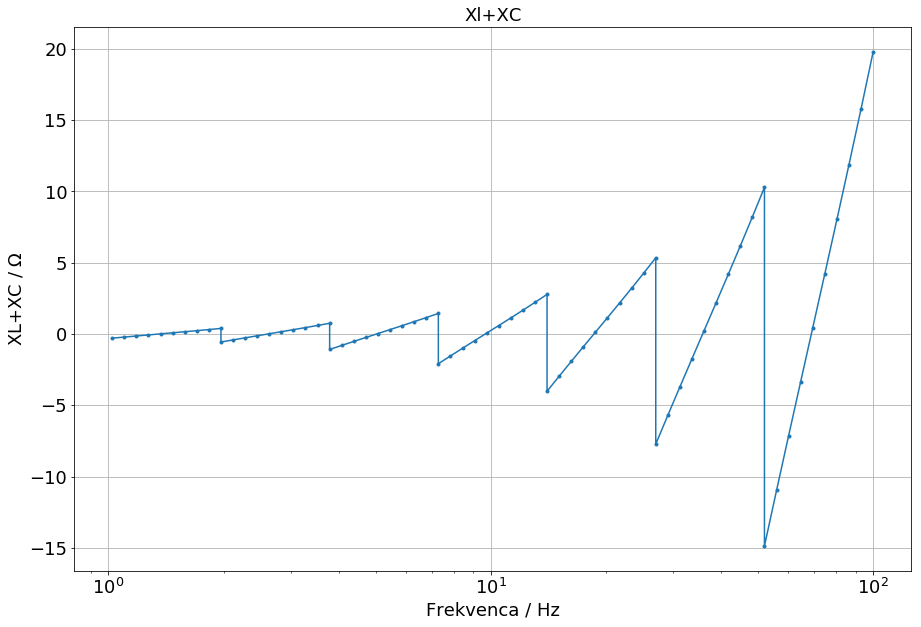

In [0]:
L=60e-3
s=np.linspace(0.01,2,8)
freq1=[]
X=[]


for i in range(1,8):
  s1=np.linspace(s[i-1],s[i],10)
  freq=pow(10,s1)
  freq1=np.concatenate([freq1,freq])
  XL=(2*np.pi*freq)*L
  XC=-0.0005*1/(2*np.pi*freq*C[i])
  X=np.concatenate([X,XL+XC])
  print('Copti = ', C[i]/0.005, 'za frekvence med ',freq[0],'in ',freq[9])

print(freq1,X)

plt.figure(figsize=(15,10))
plt.title('Xl+XC',fontsize=18)
plt.ylabel('XL+XC / $\Omega $',fontsize=18)
plt.xlabel('Frekvenca / Hz',fontsize=18)
plt.tick_params(labelsize=18)
#plt.ylim(1,1000)

plt.semilogx(freq1,(X),'.-')
plt.grid()
plt.show()
